In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install cvxpy

In [ ]:
pip install wheel

In [ ]:
pip install gunicorn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS


from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/campus placement/ml-with-python-course-project 2/train.csv")

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
# check null values in df
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Dataset has 1 integer, 8 object and 6 float datatypes.
No other columns have missing values except salary column. There are 148 non-null values in salary column i.e. 67 null values which shows that 67 candidates weren't placed.
We can't drop these values as they give information on candidates who weren't placed.
Imputing values with mean/median would be very wrong because candidates who weren't placed can't get salary.
So we impute these values with 0.

Data Cleaning

In [ ]:
df = df.drop('sl_no',axis=1)

Imputing null values in Salary column with 0

In [ ]:
df['salary'].fillna(0,inplace=True)
df['salary'].isnull().sum()

0

Checking for outliers

Text(0.5, 1.0, 'MBA percentage')

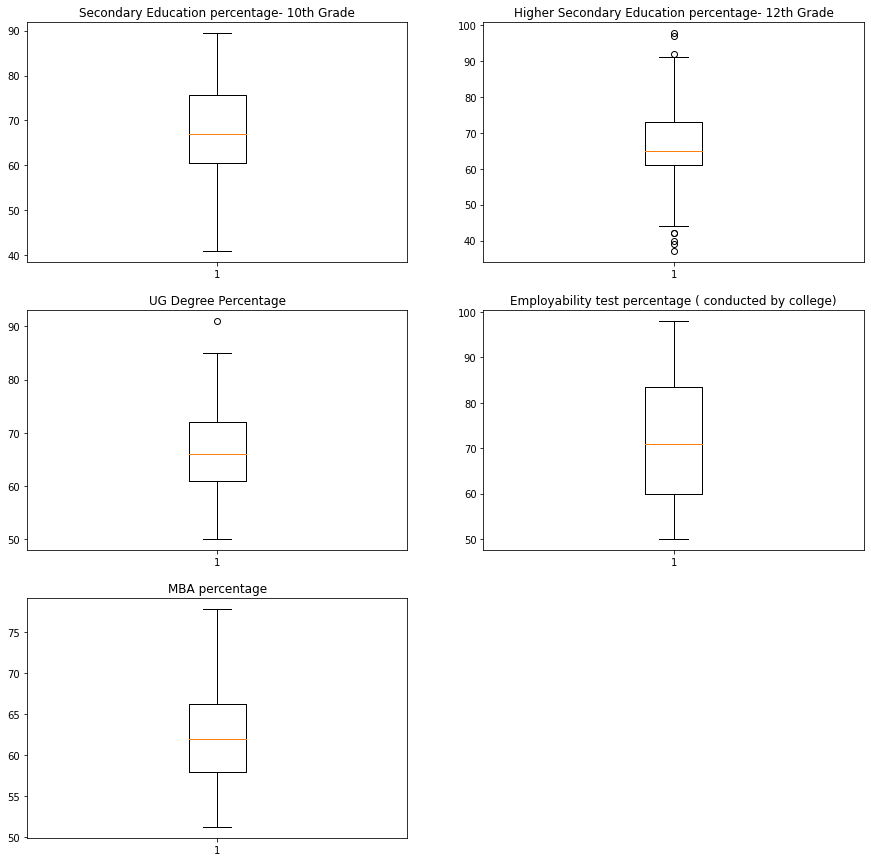

In [ ]:
plt.figure(figsize = (15, 15))

ax=plt.subplot(321)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary Education percentage- 10th Grade')

ax=plt.subplot(322)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary Education percentage- 12th Grade')

ax=plt.subplot(323)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree Percentage')

ax=plt.subplot(324)
plt.boxplot(df['etest_p'])
ax.set_title('Employability test percentage ( conducted by college)')

ax=plt.subplot(325)
plt.boxplot(df['mba_p'])
ax.set_title('MBA percentage')

Here we can see that only hsc_p column has outliers.

In [ ]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1   

df[(df['hsc_p'] <= Q1 - 1.5 * IQR) | (df['hsc_p'] >= Q3 + 1.5 *IQR)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
24,0,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
42,0,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,1,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,0,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
134,1,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
169,0,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
177,1,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
206,0,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


Handling with Catagorical Data

In [ ]:
# we convert object type data into numerical datatype
    

df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [ ]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

[0 1]
['Placed', 'Not Placed']
Categories (2, object): ['Placed', 'Not Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']


In [ ]:
# Replace the value in 0,1 or quantitative parameters

df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
df["gender"].dtype

dtype('int64')

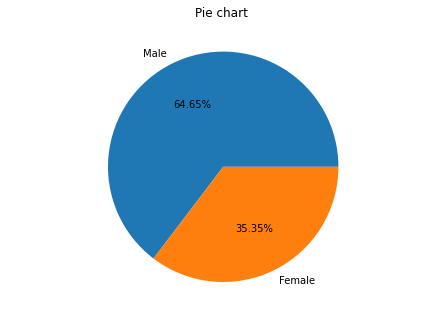

In [ ]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 0


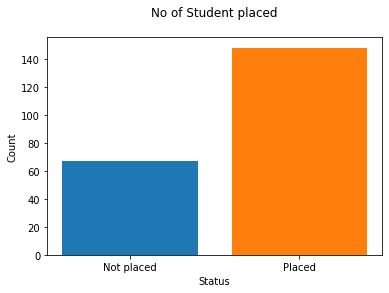

In [ ]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]=="Placed"])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.3033953488372
hsc_p mean = 66.33316279069766
mba_p mean = 62.278186046511586
degree_p mean = 66.37018604651163


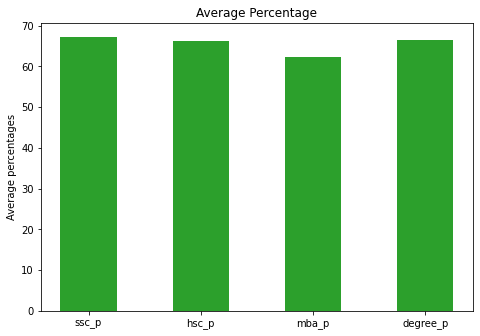

In [ ]:
#average percentage of all education qualification
values = [(df['ssc_p'].mean()),(df['hsc_p'].mean()),(df['mba_p'].mean()),(df['degree_p'].mean())]
print('scc_p mean = ' +str(df['ssc_p'].mean()))
print('hsc_p mean = ' +str(df['hsc_p'].mean()))
print('mba_p mean = ' +str(df['mba_p'].mean()))
print('degree_p mean = ' +str(df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

Which factor influenced a candidate in getting placed?
or

Does percentage matters for one to get placed?

In [ ]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(df['status'].corr(df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(df['status'].corr(df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(df['status'].corr(df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(df['status'].corr(df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(df['status'].corr(df['etest_p'])*100,1),'%')

print('workexp to placement ', round(df['status'].corr(df['workex'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


In [ ]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


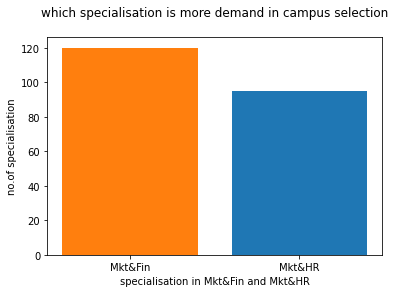

In [ ]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,91.0,Mkt&Fin,74.49,1,400000.0
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,74.0,Mkt&Fin,53.62,1,275000.0
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,59.0,Mkt&Fin,69.72,1,295000.0
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,70.0,Mkt&HR,60.23,1,204000.0


DATA PREPROCESSING

Label Encoding (for the categorical columns having only two types of classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['workex','specialisation','status','ssc_b','hsc_b']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,0,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,0,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,0,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


One-hot Encoding (for categorical columns having more than two types of classes)

In [ ]:
dummy_hsc_s=pd.get_dummies(df['hsc_s'],prefix='hsc')
dummy_degree_t=pd.get_dummies(df['degree_t'],prefix='degree')

df1=pd.concat([df,dummy_hsc_s,dummy_degree_t],axis=1)
df1.drop(['hsc_s','degree_t','hsc_b','ssc_b','hsc_s','degree_t'],axis=1,inplace=True)
df1.head(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.00,1,58.80,1,270000.0,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.50,0,66.28,1,200000.0,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.00,0,57.80,1,250000.0,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.00,1,59.43,0,0.0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.80,0,55.50,1,425000.0,0,1,0,1,0,0
5,0,55.00,49.80,67.25,1,55.00,0,51.58,0,0.0,0,0,1,0,0,1
6,1,46.00,49.20,79.00,0,74.28,0,53.29,0,0.0,0,1,0,1,0,0
7,0,82.00,64.00,66.00,1,67.00,0,62.14,1,252000.0,0,0,1,0,0,1
8,0,73.00,79.00,72.00,0,91.34,0,61.29,1,231000.0,0,1,0,1,0,0
9,0,58.00,70.00,61.00,0,54.00,0,52.21,0,0.0,0,1,0,1,0,0


In [ ]:
df1.to_csv("/content/drive/MyDrive/campus placement/ml-with-python-course-project 2/preprocess_data.csv")

In [ ]:
df1

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,0,58.00,60.00,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,0,67.00,67.00,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,1,74.00,66.00,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0


In [ ]:
x = df1.drop(['status'],axis = 1)
y = df1.status

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            215 non-null    int64  
 1   ssc_p             215 non-null    float64
 2   hsc_p             215 non-null    float64
 3   degree_p          215 non-null    float64
 4   workex            215 non-null    int64  
 5   etest_p           215 non-null    float64
 6   specialisation    215 non-null    int64  
 7   mba_p             215 non-null    float64
 8   salary            215 non-null    float64
 9   hsc_Arts          215 non-null    uint8  
 10  hsc_Commerce      215 non-null    uint8  
 11  hsc_Science       215 non-null    uint8  
 12  degree_Comm&Mgmt  215 non-null    uint8  
 13  degree_Others     215 non-null    uint8  
 14  degree_Sci&Tech   215 non-null    uint8  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 16.5 KB


In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 1)

In [ ]:
print('y',y.value_counts(),sep='\n')
print()
print('y_train',Y_train.value_counts(),sep='\n')

y
1    148
0     67
Name: status, dtype: int64

y_train
1    120
0     52
Name: status, dtype: int64


Dataset is imbalanced. Problem is that models trained on imbalanced datasets often have poor results when they have to generalize.

SMOTE resampling on training set

In [ ]:
from imblearn.over_sampling import SMOTE



In [ ]:
pip install mlrose

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
pip install mlrose

In [ ]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
smote= SMOTE(random_state=42)
x_train,y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [ ]:
y_train.value_counts()

1    120
0    120
dtype: int64

In [ ]:
y_train

,0
0,1
1,1
2,1
3,1
4,1
...,...
235,0
236,0
237,0
238,0


In [ ]:
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

Logistic Regression

In [ ]:
warnings.filter = warnings.simplefilter('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(x_train, y_train)))

Accuracy of logistic regression classifier on test set: 1.000
Accuracy of logistic regression classifier on train set: 1.000


Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid=[{'penalty':['l1','l2','elasticnet','none'],
             'C':np.logspace(-4,4,20),
             'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter':[100,200,1000,2500,5000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logreg,param_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
best_clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 2828 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.9min finished


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_ypred=clf.predict(x_test)

In [ ]:
print('Accuracy of logistic regression classifier(GridSearchCV) on test set: {:.3f}'.format(best_clf.score(x_test, y_test)))
print('Accuracy of logistic regression classifier(GridSearchCV) on train set: {:.3f}'.format(best_clf.score(x_train, y_train)))

Accuracy of logistic regression classifier(GridSearchCV) on test set: 1.000
Accuracy of logistic regression classifier(GridSearchCV) on train set: 1.000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))


Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



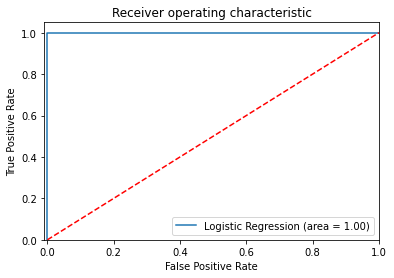

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt= dt.predict(x_test)


In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt.score(x_test, y_test)))
print('Accuracy of Decision Tree classifier on train set: {:.3f}'.format(dt.score(x_train, y_train)))

Accuracy of Decision Tree classifier on test set: 1.000
Accuracy of Decision Tree classifier on train set: 1.000


In [ ]:
param_grid_dt={'criterion':['gini','entropy'],'max_depth':[2,3,4,5],'max_features':('auto','sqrt','log2'),'min_samples_split':(2,4,6)}

In [ ]:
clf_dt=GridSearchCV(dt,param_grid_dt,n_jobs=-1,verbose=True,cv=5) 

In [ ]:
clf_dt.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
clf_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
best_ypred_dt=clf_dt.predict(x_test)

In [ ]:
print('Accuracy of Decision Tree(GridSearchCV) classifier on test set: {:.3f}'.format(clf_dt.score(x_test, y_test)))
print('Accuracy of Decision Tree(GridSearchCV) classifier on train set: {:.3f}'.format(clf_dt.score(x_train, y_train)))

Accuracy of Decision Tree(GridSearchCV) classifier on test set: 0.814
Accuracy of Decision Tree(GridSearchCV) classifier on train set: 0.925


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_dt)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_dt))

Confusion Matrix:
 [[10  5]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.83      0.89      0.86        28

    accuracy                           0.81        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.81      0.81      0.81        43



In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)


In [ ]:
print('Accuracy of Random Forest classifier on test set: {:.3f}'.format(rf.score(x_test, y_test)))
print('Accuracy of Random Forest classifier on train set: {:.3f}'.format(rf.score(x_train, y_train)))

Accuracy of Random Forest classifier on test set: 1.000
Accuracy of Random Forest classifier on train set: 1.000


In [ ]:
# Number of trees in random forest
n_estimators =[20,60,100,120]
# Number of features to consider at every split
max_features = [0.2,0.6,1.0]
# Maximum number of levels in tree
max_depth = [2,4,8,None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion=['gini','entropy']

In [ ]:
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,'criterion':criterion}

In [ ]:
clf_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, verbose=2, n_jobs = -1)

In [ ]:
clf_rf.fit(x_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_ypred_rf=clf_rf.predict(x_test)

In [ ]:
print('Accuracy of Random Forest(GridSearchCV) classifier on test set: {:.3f}'.format(clf_rf.score(x_test, y_test)))
print('Accuracy of Random Forest(GridSearchCV) classifier on train set: {:.3f}'.format(clf_rf.score(x_train, y_train)))

Accuracy of Random Forest(GridSearchCV) classifier on test set: 0.977
Accuracy of Random Forest(GridSearchCV) classifier on train set: 0.983


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_rf)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_rf))

Confusion Matrix:
 [[15  0]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        28

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



In [ ]:
from sklearn.naive_bayes import BernoulliNB 
nb = BernoulliNB() 
nb.fit(x_train, y_train) 
  
#Applying and predicting 
y_pred_nb = nb.predict(x_test) 

print('Accuracy of Naive Bayes classifier on test set: {:.3f}'.format(nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set: {:.3f}'.format(nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set: 1.000
Accuracy of Naive Bayes classifier on train set: 1.000


Hyperparameter Tuning for Naive Bayes

In [ ]:
para_gird_nb={'alpha':[0.01,0.1,0.5,1,10]}

In [ ]:
clf_nb=GridSearchCV(nb,para_gird_nb,n_jobs=-1,cv=5,verbose=5)

In [ ]:
clf_nb.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
clf_nb.best_estimator_

BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
best_ypred_nb=clf_nb.predict(x_test)

In [ ]:
print('Accuracy of Naive Bayes classifier on test set(GridSearchCV): {:.3f}'.format(clf_nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set(GridSearchCV): {:.3f}'.format(clf_nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set(GridSearchCV): 1.000
Accuracy of Naive Bayes classifier on train set(GridSearchCV): 1.000


Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred_nb))

Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(x_train, y_train)
y_pred_svm = svclassifier.predict(x_test)



In [ ]:
print('Accuracy of SVM  on test set: {:.3f}'.format(svclassifier.score(x_test, y_test)))
print('Accuracy of SVM  on train set: {:.3f}'.format(svclassifier.score(x_train, y_train)))


Accuracy of SVM  on test set: 1.000
Accuracy of SVM  on train set: 1.000


In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred_svm))

Confusion Matrix:
 [[15  0]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



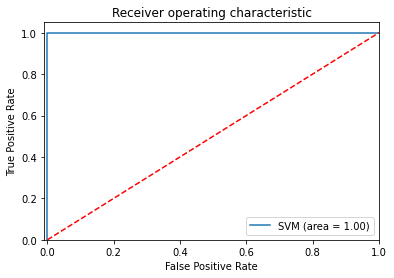

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svclassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/campus placement/model_pickle','wb') as f:
  pickle.dump(clf,f)

In [ ]:
with open('/content/drive/MyDrive/campus placement/model_pickle','rb') as f:
  map = pickle.load(f)

In [ ]:
map

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 200, 1000, 2500, 5000],
         

In [ ]:
map.predict(x_test.values)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['MODEL','TRAIN_ACCURACY','TEST_ACCURACY']

x.add_row(["Log Reg ", 'Log reg train = 0.896','Log reg test = 0.907'])

x.add_row(["Hyperparameter Tuning Log Reg ", 'Log reg(GridSearchCV)train = 0.908','Log reg(GridSearchCV) test = 0.907'])

x.add_row(["DT", 'DT train = 1.000','DT test = 0.791'])

x.add_row(["Hyperparam Tuning for DT", 'DT(GridSearchCV) train = 0.908','DT(GridSearchCV)test = 0.721'])

x.add_row(["RF", 'RF train = 1.000','RF test = 0.884'])

x.add_row(["Hyperparam Tuning for RF", 'RF(GridSearchCV) train = 1.000','RF(GridSearchCV) test = 0.814'])

x.add_row(["NB BernoulliNB", 'NB train = 0.762','NB test = 0.698'])

x.add_row(["Hyperparameter Tuning for NB", 'NB train (GridSearchCV)= 0.758','NB test set(GridSearchCV): 0.698'])

x.add_row(["SVM", 'Accuracy = SVM train = 0.912','Accuracy = SVM test = 0.907'])












print('\n')
print(x)



+--------------------------------+------------------------------------+------------------------------------+
|             MODEL              |           TRAIN_ACCURACY           |           TEST_ACCURACY            |
+--------------------------------+------------------------------------+------------------------------------+
|            Log Reg             |       Log reg train = 0.896        |        Log reg test = 0.907        |
| Hyperparameter Tuning Log Reg  | Log reg(GridSearchCV)train = 0.908 | Log reg(GridSearchCV) test = 0.907 |
|               DT               |          DT train = 1.000          |          DT test = 0.791           |
|    Hyperparam Tuning for DT    |   DT(GridSearchCV) train = 0.908   |    DT(GridSearchCV)test = 0.721    |
|               RF               |          RF train = 1.000          |          RF test = 0.884           |
|    Hyperparam Tuning for RF    |   RF(GridSearchCV) train = 1.000   |   RF(GridSearchCV) test = 0.814    |
|         NB Bern

In [ ]:
df

In [ ]:
!python --version

In [ ]:
pip freeze>"/content/drive/MyDrive/campus placement/requirements.txt"

Conclusion Comparing all the applied models, it is evident the Logistic Regression with GridSearchCV is performing the best with a precision and accuracy score of 90.8 and 90.7 respectively. 